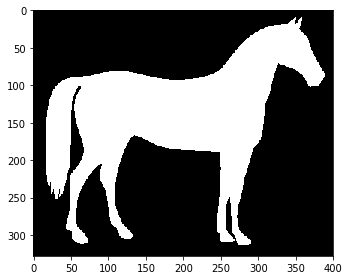

In [1]:
import skimage
from skimage import data
from skimage import io
import numpy as np

image = data.horse()
image = np.invert(image)
io.imshow(image)
io.show()

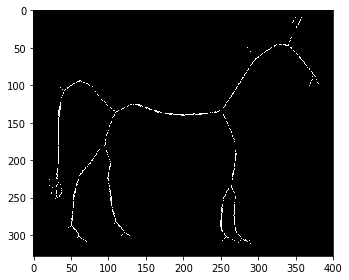

In [23]:
from skimage.morphology import binary_erosion
from skimage.morphology import binary_dilation

b = skimage.morphology.disk(1)
y1 = image
n, N = 0, 0
s = []
skelet = np.zeros(image.shape, dtype=bool)
while True:
    y2 = binary_erosion(y1, b)
    if not y2.any():
        N = n
        s.append(y1)
        break
    y3 = binary_dilation(y2, b)
    s.append(np.logical_and(y1, np.logical_not(y3)))
    skelet = np.logical_or(skelet, s[-1])
    n += 1
    y1 = y2

io.imshow(skelet)
io.show()

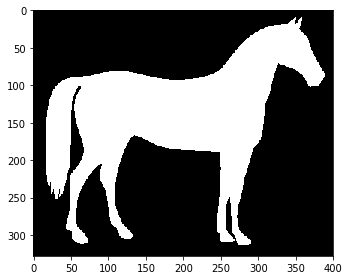

Image is recovered: True


In [33]:
A = np.zeros(skelet.shape)
n = N
while True:
    A = np.logical_or(A, s[n])
    if n == 0:
        break
    A = binary_dilation(A, b)
    n -= 1
    
io.imshow(A)
io.show()

print('Image is recovered:', (image == A).all())